# Analyzing Personality Data 🌊

Using the **Persona-Predict** 🧠 service to create an analysis based on the author's text ✍️ and analyze the 🗣 personality traits generated. For more information about the service visit: [docs.neuroquest.ai/persona-predict](https://docs.neuroquest.ai/persona-predict/)

In [1]:
import os

import pandas as pd
from faker import Faker
from IPython.display import JSON

import utility as U

In [2]:
NQ_USER = os.getenv("NQ_USER")
NQ_PASSWORD = os.getenv("NQ_PASSWORD")

## Create the Personality Analysis 📊

- Sends the text to the **Persona-Predict** Service, if the analysis already exists it is read from the file.

In [3]:
if not os.path.exists("predict-result.json"):
    print("Sending the text for analysis...")
    analysis = U.predict_create(
        token=U.login(user=NQ_USER, password=NQ_PASSWORD).get("data").get("token"),
        data={
            "name": Faker().name(),
            "essay": U.get_my_txt_essay(),
        },
        save_result=True,
    )
else:
    print("Reading the saved analysis...")
    analysis = U.get_predict_result_in_file()

Reading the saved analysis...


In [4]:
JSON(analysis, expanded=True)

<IPython.core.display.JSON object>

## 1. Big-Five Scores 🎭

In [5]:
score_big_five = list(
    map(
        U.get_big_five,
        analysis.get("data").get("person").get("analysis").get("personalities"),
    )
)

In [6]:
pd.DataFrame(score_big_five)

,O,C,E,A,N
0,56.79208,48.436203,59.057705,34.688023,30.81543


In [7]:
U.plot_big_five_bar(score_big_five=score_big_five)

<center><img src='plots/big_five_plot_bar.png'/></center>

In [8]:
U.plot_big_five_radar(score_big_five=score_big_five)

## 2. Big-Five Openness & Facets 🧑‍🎨

In [9]:
score_openness_facets = list(
    map(
        U.get_openness_facets,
        analysis.get("data")
        .get("person")
        .get("analysis")
        .get("personalities")[0]
        .get("openness")
        .get("traits"),
    )
)

In [10]:
pd.DataFrame(
    [(list(x.keys())[0], list(x.values())[0]) for x in score_openness_facets],
    columns=["Facet", "Value"],
)

,Facet,Value
0,Imagination,65.457108
1,Artistic Interests,58.718273
2,Emotionality,60.955425
3,Adventurousness,56.912258
4,Intellect,60.235523
5,Liberalism,45.959911


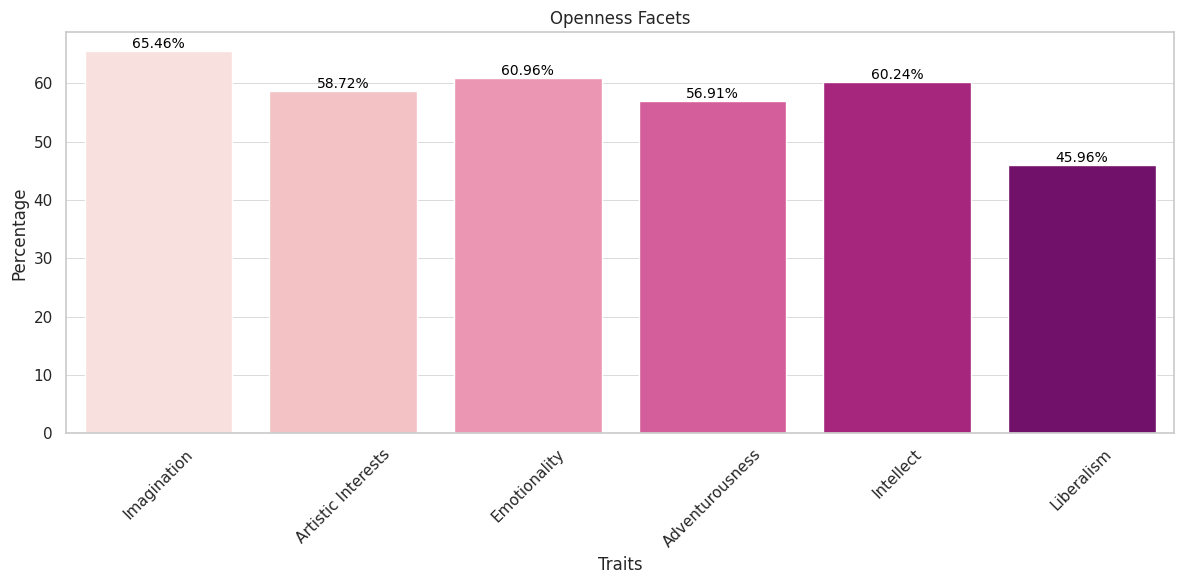

In [11]:
U.plot_big_five_openness_facets_bar(score_openness_facets=score_openness_facets)

## 2. Big-Five Conscientiousness & Facets 🧑‍🔬

In [12]:
score_conscientiousness_facets = list(
    map(
        U.get_conscientiousness_facets,
        analysis.get("data")
        .get("person")
        .get("analysis")
        .get("personalities")[0]
        .get("conscientiousness")
        .get("traits"),
    )
)

In [13]:
pd.DataFrame(
    [(list(x.keys())[0], list(x.values())[0]) for x in score_conscientiousness_facets],
    columns=["Facet", "Value"],
)

,Facet,Value
0,Self-Efficacy,57.754070
1,Orderliness,46.202072
2,Dutifulness,45.190426
3,Achievement Striving,60.313824
4,Self-Discipline,53.504322
5,Cautiousness,36.794422


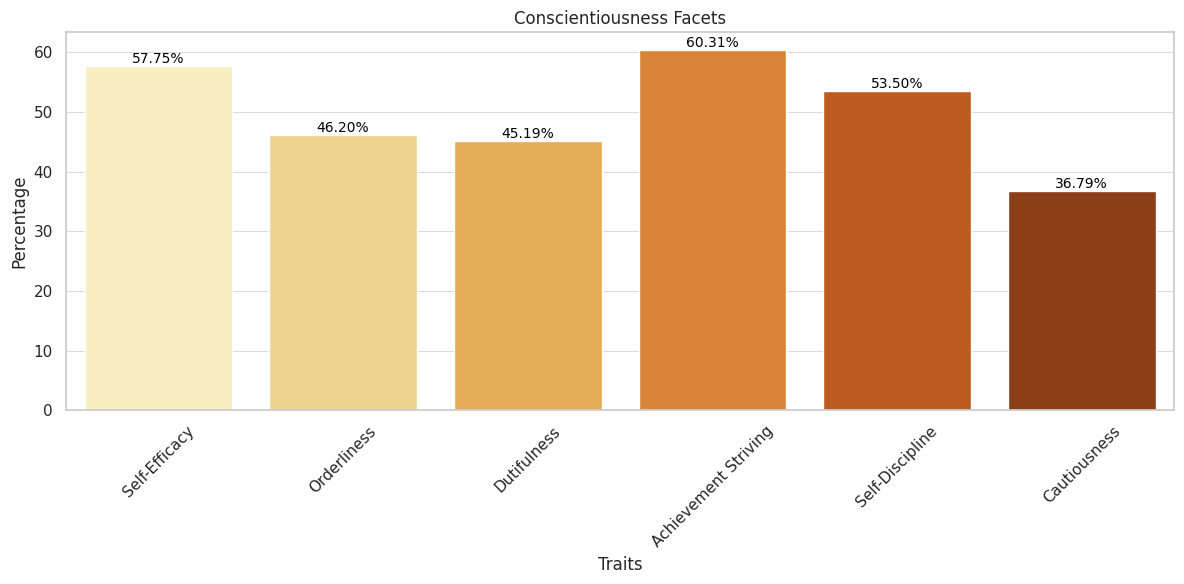

In [14]:
U.plot_big_five_conscientiousness_facets_bar(
    score_conscientiousness_facets=score_conscientiousness_facets
)

## 3. Big-Five Extraversion & Facets 🕺💃

In [15]:
score_extraversion_facets = list(
    map(
        U.get_extraversion_facets,
        analysis.get("data")
        .get("person")
        .get("analysis")
        .get("personalities")[0]
        .get("extraversion")
        .get("traits"),
    )
)

In [16]:
pd.DataFrame(
    [(list(x.keys())[0], list(x.values())[0]) for x in score_extraversion_facets],
    columns=["Facet", "Value"],
)

,Facet,Value
0,Friendliness,56.245632
1,Gregariousness,55.516914
2,Assertiveness,60.151596
3,Activity Level,59.797470
4,Excitement-Seeking,63.227478
5,Cheerfulness,60.043121


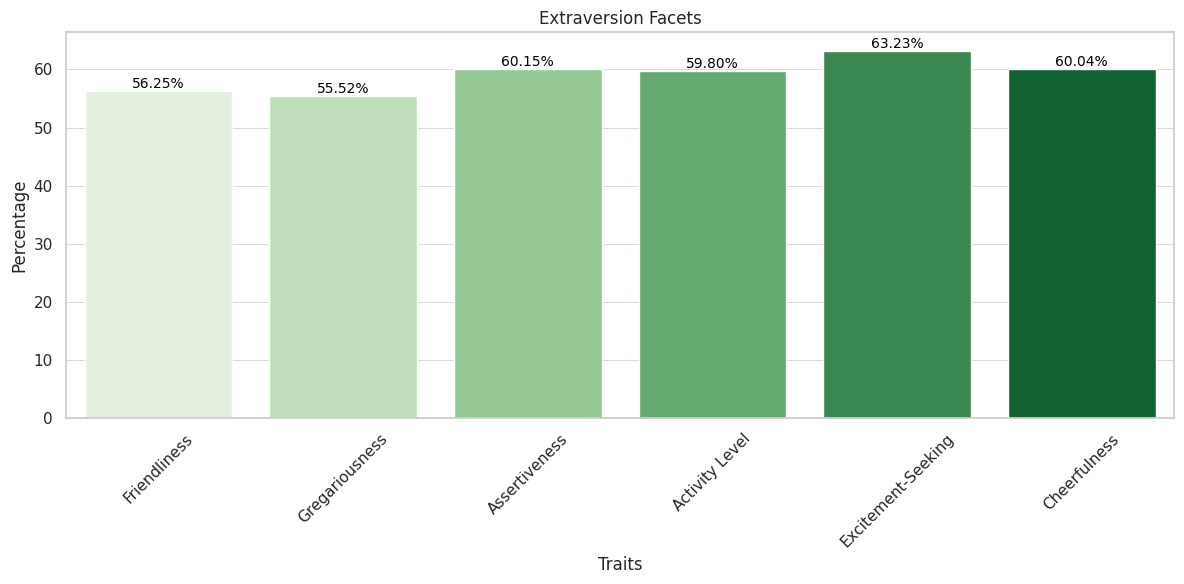

In [17]:
U.plot_big_five_extraversion_facets_bar(
    score_extraversion_facets=score_extraversion_facets
)

## 4. Big-Five Agreeableness & Facets 🙋🧡

In [18]:
score_agreeableness_facets = list(
    map(
        U.get_agreeableness_facets,
        analysis.get("data")
        .get("person")
        .get("analysis")
        .get("personalities")[0]
        .get("agreeableness")
        .get("traits"),
    )
)

In [19]:
pd.DataFrame(
    [(list(x.keys())[0], list(x.values())[0]) for x in score_agreeableness_facets],
    columns=["Facet", "Value"],
)

,Facet,Value
0,Trust,50.434765
1,Morality,29.239782
2,Altruism,52.101810
3,Cooperation,25.889780
4,Modesty,14.818019
5,Sympathy,41.177429


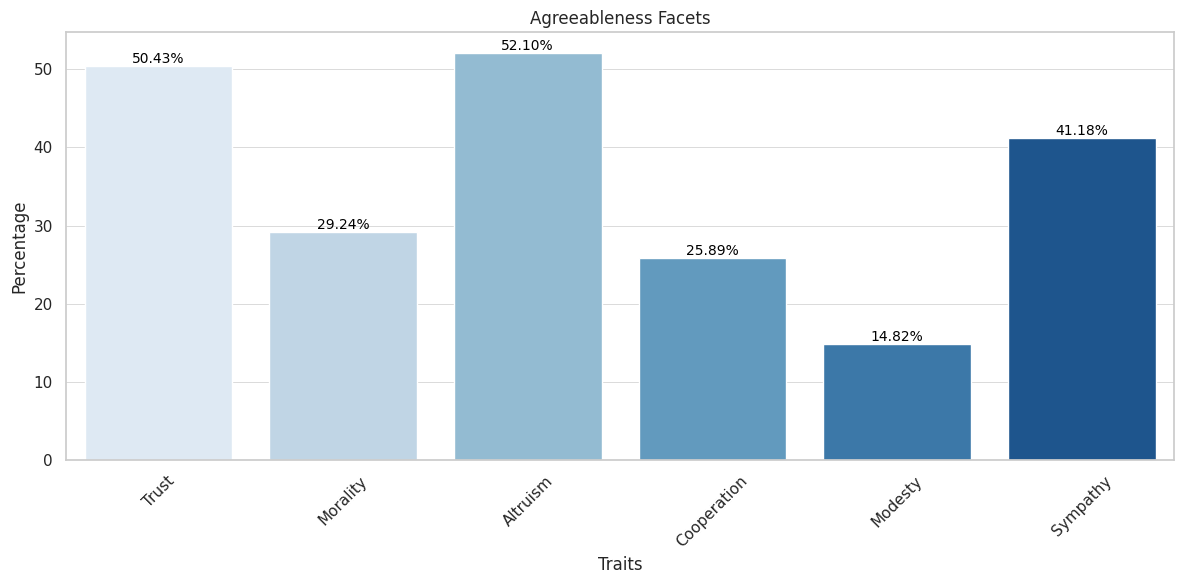

In [20]:
U.plot_big_five_agreeableness_facets_bar(
    score_agreeableness_facets=score_agreeableness_facets
)

## 5. Big-Five Neuroticism & Facets 🙅💢

In [21]:
score_neuroticism_facets = list(
    map(
        U.get_neuroticism_facets,
        analysis.get("data")
        .get("person")
        .get("analysis")
        .get("personalities")[0]
        .get("neuroticism")
        .get("traits"),
    )
)

In [22]:
pd.DataFrame(
    [(list(x.keys())[0], list(x.values())[0]) for x in score_neuroticism_facets],
    columns=["Facet", "Value"],
)

,Facet,Value
0,Anxiety,28.875700
1,Anger,35.011662
2,Depression,26.493742
3,Self-Consciousness,22.648630
4,Immoderation,44.146961
5,Vulnerability,23.420885


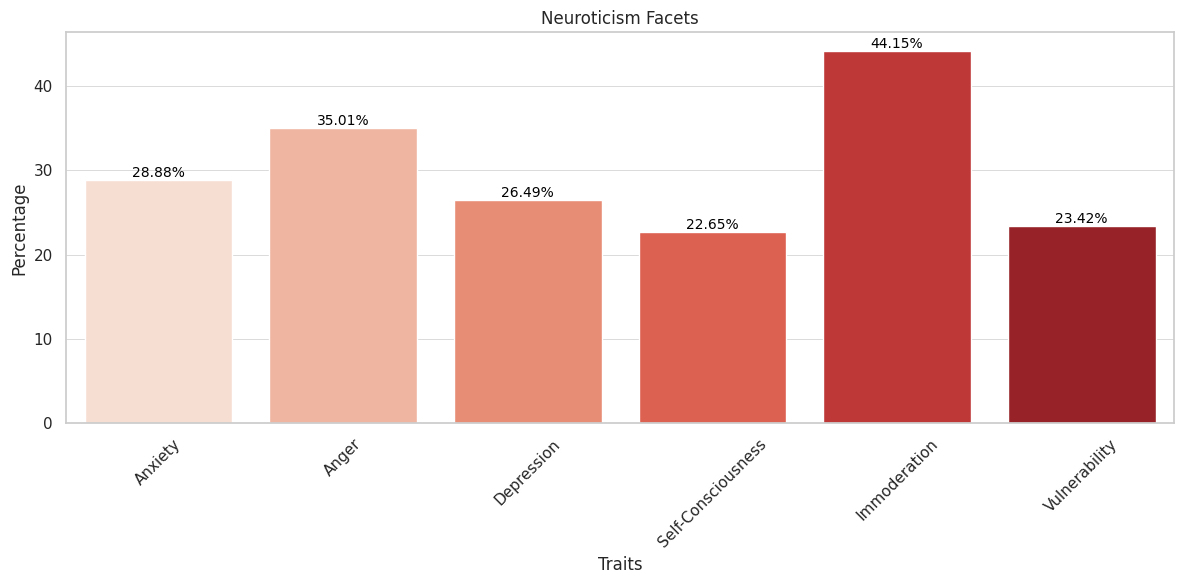

In [23]:
U.plot_big_five_neuroticism_facets_bar(
    score_neuroticism_facets=score_neuroticism_facets
)